In [1]:
from infrastructure.classes import Experiment, TrainParameters
from datasets import ConvexBananaDataset
from utils.plot import plot_quantile_levels_from_dataset
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float64, device=torch.device("cpu")),
    dataset_name="convex_banana",
    dataset_number_of_points=10**4,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="monge_gap_transport",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=8,
        activation_function_name="GELU",
        potential_to_estimate_with_neural_network="y",
        jacobian_weight=0.1,
        monge_gap_weight=0.1 
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=100,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)
dataset = ConvexBananaDataset(**experiment.dataset_parameters, tensor_parameters=experiment.tensor_parameters)

model = train(experiment)

/Users/vladimir.kondratyev/conditional_quantile_function/src/pushforward_operators/fast_non_linear_vector_quantile_regression/vqr/__init__.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution
Epoch 100: 100%|██████████| 100/100 [02:24<00:00,  1.45s/it, Objective=0.116, LR=0.000000]


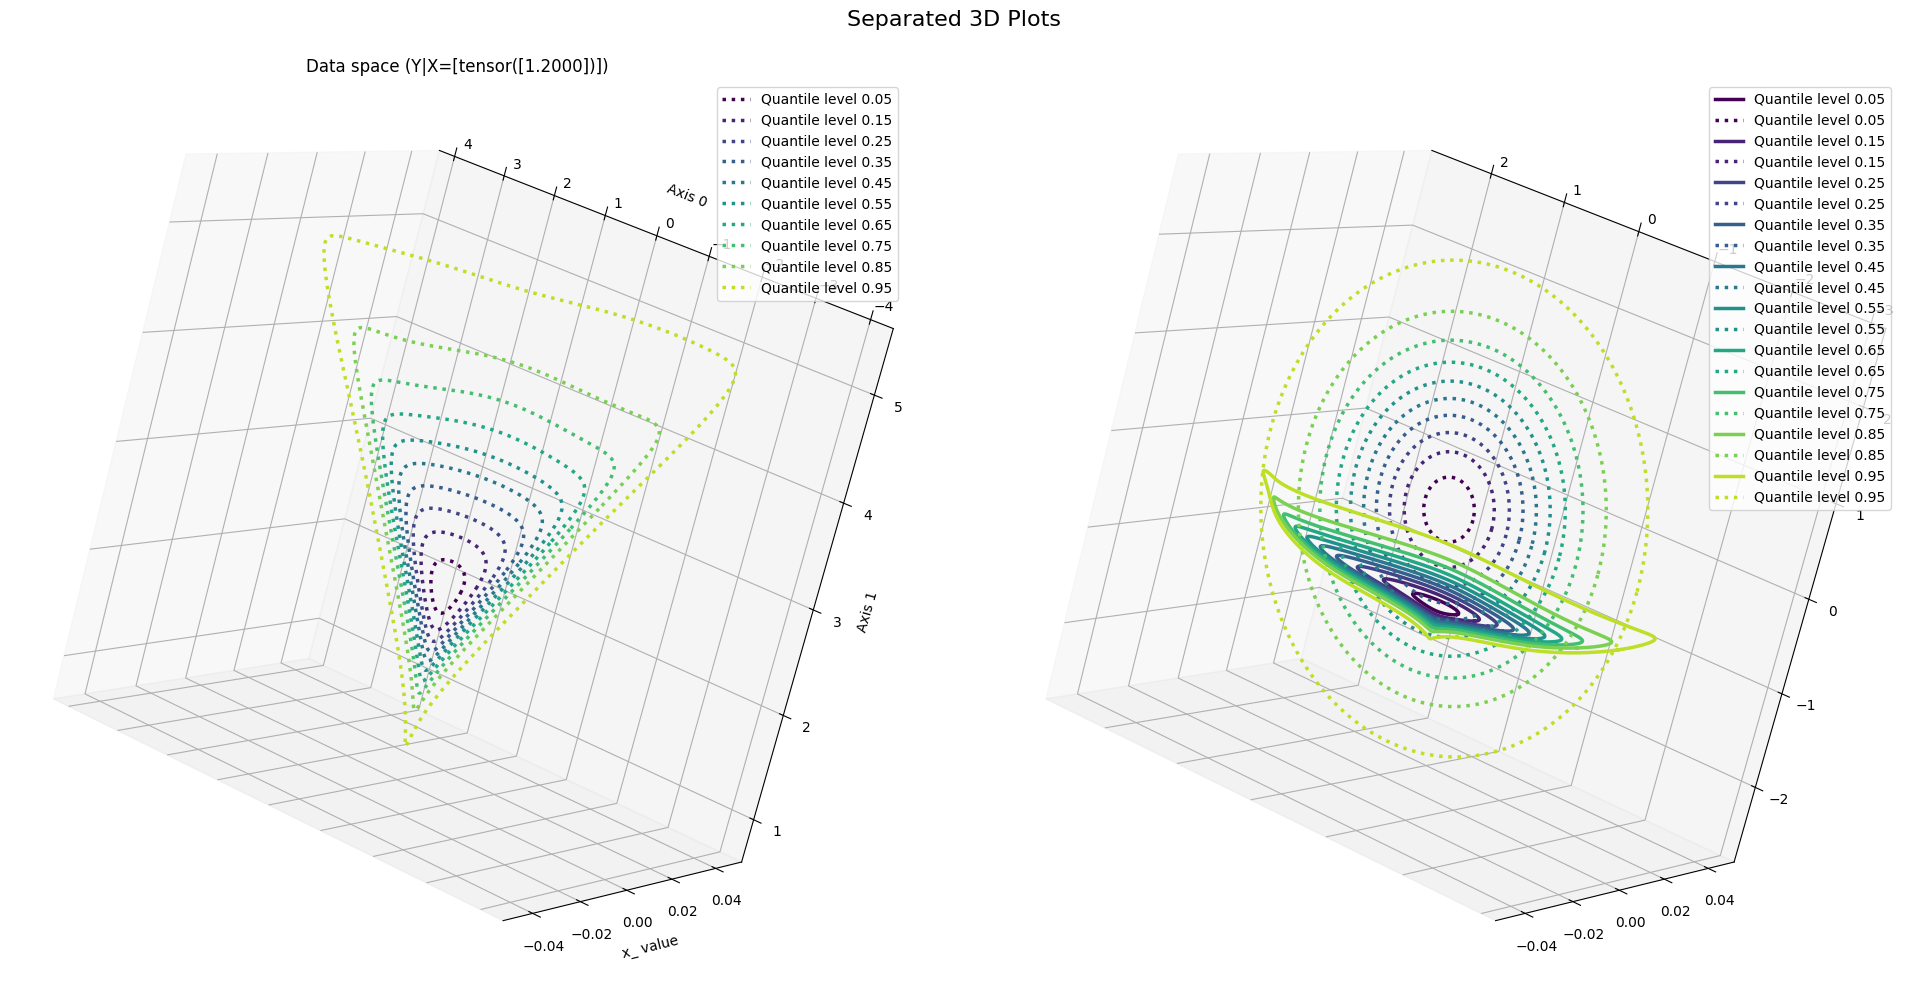

In [2]:
%matplotlib inline

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.Tensor([[1.2]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)